In [ ]:
import pandas as pd

# Load the dataset
data_path = 'Transformed_Final_Data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its summary statistics
data.head(), data.describe()


(            County  Year  Grades Pre-K  Grades K-5  Grades 6-8  Grades 9-12  \
 0  Allegany County  2010           506        3854        1952         2710   
 1  Allegany County  2011           499        3809        1945         2660   
 2  Allegany County  2012           520        3822        1923         2664   
 3  Allegany County  2013           523        3828        1951         2570   
 4  Allegany County  2014           508        3879        1888         2590   
 
    Unemploy_Value  POPULATION  MURDER  RAPE  ROBBERY  AGG. ASSAULT  B & E  \
 0         39459.0     72721.0     4.0  26.0     48.0         234.0  596.0   
 1         37349.0     75799.0     6.0  30.0     62.0         153.0  608.0   
 2         35698.0     75413.0     3.0  22.0     42.0         201.0  571.0   
 3         33953.0     73834.0     4.0  28.0     63.0         154.0  547.0   
 4         29871.0     73299.0     2.0  15.0     31.0         153.0  550.0   
 
    LARCENY THEFT  M/V THEFT  GRAND TOTAL  VIOLE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# Load your dataset
data_path = data_path # Update this path
data = pd.read_csv(data_path)

# Define the features and targets
X = data[['County', 'Year', 'Grades Pre-K', 'Grades K-5', 'Grades 6-8', 'Grades 9-12', 'Unemploy_Value', 'POPULATION']]
y = data[['MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL', 'VIOLENT CRIME TOTAL', 'PROPERTY CRIME TOTALS']]

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Grades Pre-K', 'Grades K-5', 'Grades 6-8', 'Grades 9-12', 'Unemploy_Value', 'POPULATION']),
        ('cat', OneHotEncoder(sparse_output=False), ['County'])  # Ensure dense output for TensorFlow compatibility
    ])

# Create a preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model architecture
input_layer = Input(shape=(X_train.shape[1],))
dense1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
output_layer = Dense(y_train.shape[1], activation='linear')(dense2)  # Linear activation for regression outputs

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                2048      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 4458 (17.41 KB)
Trainable params: 4458 (17.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 50ms/step - loss: 36550040.0000 - mae: 2294.0334 - val_loss: 10924196.0000 - val_mae: 1167.9395
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 36548844.0000 - mae: 2293.9683 - val_loss: 10923667.0000 - val_mae: 1167.9006
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 36547656.0000 - mae: 2293.9128 - val_loss: 10923086.0000 - val_mae: 1167.8538
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 36546208.0000 - mae: 2293.8364 - val_loss: 10922440.0000 - val_mae: 1167.7928
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 36544688.0000 - mae: 2293.7610 - val_loss: 10921645.0000 - val_mae: 1167.7125
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 36543292.0000 - mae: 2293.6675 - val_loss: 10920716.0000 - val_mae: 1167.6069
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 36541348.0000 - mae: 2293.5286 - 

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


2/2 [==============================] - 0s 12ms/step - loss: 15915475.0000 - mae: 1373.2036
Test Loss: 15915475.0, Test MAE: 1373.20361328125


In [ ]:
# Make predictions
predictions = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


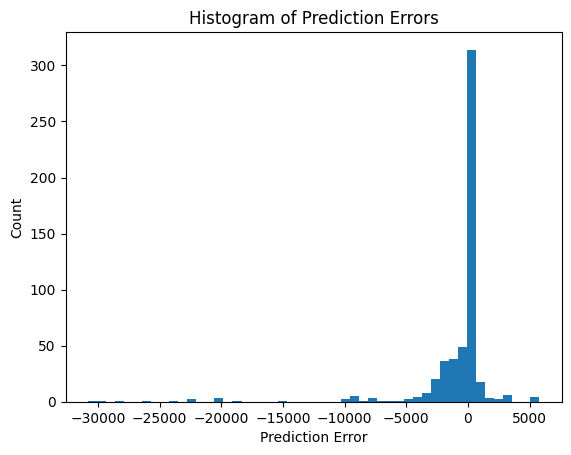

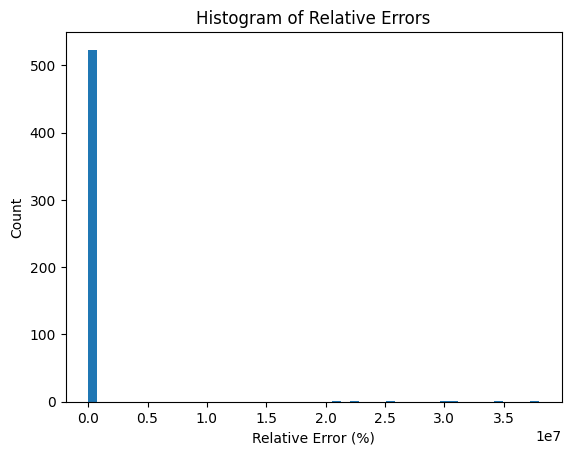

In [ ]:
import matplotlib.pyplot as plt
# Calculate errors
errors = predictions - y_test
plt.hist(errors.values.flatten(), bins=50)  # Using flatten() to handle multi-dimensional data appropriately
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Histogram of Prediction Errors')
plt.show()

# Calculate the relative error as a percentage of actual values
epsilon = 1e-5  # A small number to avoid division by zero
relative_errors = (errors / (y_test + epsilon)) * 100
plt.hist(relative_errors.values.flatten(), bins=50)
plt.xlabel('Relative Error (%)')
plt.ylabel('Count')
plt.title('Histogram of Relative Errors')
plt.show()

In [19]:
def build_model_1(input_shape, output_units):
    input_layer = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(output_units, activation='linear')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def build_model_2(input_shape, output_units):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(32, activation='relu')(x)
    output_layer = Dense(output_units, activation='linear')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Setup Random Forest and Gradient Boosting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_type='NN', target_index=None):
    if model_type == 'NN':
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        mse, mae = model.evaluate(X_test, y_test, verbose=0)
        return mse, mae
    else:  # Traditional model
        mse_list = []
        mae_list = []
        for i in range(y_train.shape[1]):  # Iterate over each crime type
            model.fit(X_train, y_train.iloc[:, i])
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test.iloc[:, i], predictions)
            mae = mean_absolute_error(y_test.iloc[:, i], predictions)
            mse_list.append(mse)
            mae_list.append(mae)
        return np.mean(mse_list), np.mean(mae_list)

# Initialize and train models
nn_model_1 = build_model_1(X_train.shape[1], y_train.shape[1])
nn_model_2 = build_model_2(X_train.shape[1], y_train.shape[1])
mse1, mae1 = train_evaluate_model(nn_model_1, X_train, y_train, X_test, y_test)
mse2, mae2 = train_evaluate_model(nn_model_2, X_train, y_train, X_test, y_test)
mse_rf, mae_rf = train_evaluate_model(rf_model, X_train, y_train, X_test, y_test, 'ML')
mse_gb, mae_gb = train_evaluate_model(gb_model, X_train, y_train, X_test, y_test, 'ML')

# Print results
print("Model 1 NN - MSE: {}, MAE: {}".format(mse1, mae1))
print("Model 2 NN - MSE: {}, MAE: {}".format(mse2, mae2))
print("Random Forest - MSE: {}, MAE: {}".format(mse_rf, mae_rf))
print("Gradient Boosting - MSE: {}, MAE: {}".format(mse_gb, mae_gb))


Model 1 NN - MSE: 7489661.5, MAE: 938.802490234375
Model 2 NN - MSE: 16254436.0, MAE: 1366.1064453125
Random Forest - MSE: 351649.42164830177, MAE: 188.33388679245286
Gradient Boosting - MSE: 242696.0727310333, MAE: 164.0764001689648


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_type='NN'):
    results = {}
    if model_type == 'NN':
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        mse, mae = model.evaluate(X_test, y_test, verbose=0)
        results['MSE'] = mse
        results['MAE'] = mae
    else:  # Traditional model
        mse_list = []
        mae_list = []
        for i in range(y_train.shape[1]):  # Iterate over each crime type
            model.fit(X_train, y_train.iloc[:, i])
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test.iloc[:, i], predictions)
            mae = mean_absolute_error(y_test.iloc[:, i], predictions)
            mse_list.append(mse)
            mae_list.append(mae)
        results['MSE'] = np.mean(mse_list)
        results['MAE'] = np.mean(mae_list)
    return results

# Initialize and train models
model_names = ["Model 1 NN", "Model 2 NN", "Random Forest", "Gradient Boosting"]
models = [build_model_1(X_train.shape[1], y_train.shape[1]), build_model_2(X_train.shape[1], y_train.shape[1]),
          RandomForestRegressor(n_estimators=100, random_state=42), GradientBoostingRegressor(n_estimators=100, random_state=42)]
model_types = ['NN', 'NN', 'ML', 'ML']

results = []
for name, model, model_type in zip(model_names, models, model_types):
    result = train_evaluate_model(model, X_train, y_train, X_test, y_test, model_type)
    result['Model'] = name
    results.append(result)

# Create DataFrame
results_df = pd.DataFrame(results)




In [24]:
# Display the DataFrame
results_df

,MSE,MAE,Model
0,7.174572e+06,902.859497,Model 1 NN
1,1.303286e+07,1226.750610,Model 2 NN
2,3.516494e+05,188.333887,Random Forest
3,2.426961e+05,164.076400,Gradient Boosting


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Initialize models
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# To store predictions
ensemble_predictions = np.zeros_like(y_test)

# Iterate over each crime type (column in y_train)
for i in range(y_train.shape[1]):
    # Train Gradient Boosting
    gb_model.fit(X_train, y_train.iloc[:, i])
    # Train Random Forest
    rf_model.fit(X_train, y_train.iloc[:, i])

    # Predict on test set
    gb_predictions = gb_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)

    # Average predictions from Gradient Boosting and Random Forest
    ensemble_predictions[:, i] = (gb_predictions + rf_predictions) / 2

# Evaluate ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions, multioutput='raw_values')
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions, multioutput='raw_values')

# Print results for each crime type
for idx, crime_type in enumerate(y_test.columns):
    print(f"Ensemble Model for {crime_type} - MSE: {ensemble_mse[idx]}, MAE: {ensemble_mae[idx]}")

# Optionally, print average MSE and MAE across all crime types
print(f"Average Ensemble Model - MSE: {np.mean(ensemble_mse)}, MAE: {np.mean(ensemble_mae)}")


Ensemble Model for MURDER - MSE: 45.17444896738764, MAE: 3.5112603947607455
Ensemble Model for RAPE - MSE: 377.183538052088, MAE: 12.609502799881954
Ensemble Model for ROBBERY - MSE: 15750.638727731073, MAE: 49.74353294504632
Ensemble Model for AGG. ASSAULT - MSE: 6218.263841538289, MAE: 51.6274041867021
Ensemble Model for B & E - MSE: 49716.059827700126, MAE: 103.74670863506103
Ensemble Model for LARCENY THEFT - MSE: 207243.98748439248, MAE: 246.51666086628694
Ensemble Model for M/V THEFT - MSE: 138993.55076543186, MAE: 135.12501847880017
Ensemble Model for GRAND TOTAL - MSE: 932129.17791818, MAE: 457.35658440287654
Ensemble Model for VIOLENT CRIME TOTAL - MSE: 38674.47278025225, MAE: 92.12623603378317
Ensemble Model for PROPERTY CRIME TOTALS - MSE: 1343093.7098786812, MAE: 525.4858566925623
Average Ensemble Model - MSE: 273224.22192109266, MAE: 167.78487654357613


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Data with model performance for each crime type
data = {
    "Crime Type": [
        "MURDER", "RAPE", "ROBBERY", "AGG. ASSAULT", "B & E",
        "LARCENY THEFT", "M/V THEFT", "GRAND TOTAL",
        "VIOLENT CRIME TOTAL", "PROPERTY CRIME TOTALS", "Average"
    ],
    "MSE": [
        45.1744, 377.1835, 15750.6387, 6218.2638, 49716.0598,
        207243.9875, 138993.5508, 932129.1779,
        38674.4728, 1343093.7099, 273224.2219
    ],
    "MAE": [
        3.5113, 12.6095, 49.7435, 51.6274, 103.7467,
        246.5167, 135.1250, 457.3566,
        92.1262, 525.4859, 167.7849
    ]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Print the DataFrame
results_df


,Crime Type,MSE,MAE
0,MURDER,4.517440e+01,3.5113
1,RAPE,3.771835e+02,12.6095
2,ROBBERY,1.575064e+04,49.7435
3,AGG. ASSAULT,6.218264e+03,51.6274
4,B & E,4.971606e+04,103.7467
5,LARCENY THEFT,2.072440e+05,246.5167
6,M/V THEFT,1.389936e+05,135.1250
7,GRAND TOTAL,9.321292e+05,457.3566
8,VIOLENT CRIME TOTAL,3.867447e+04,92.1262
9,PROPERTY CRIME TOTALS,1.343094e+06,525.4859


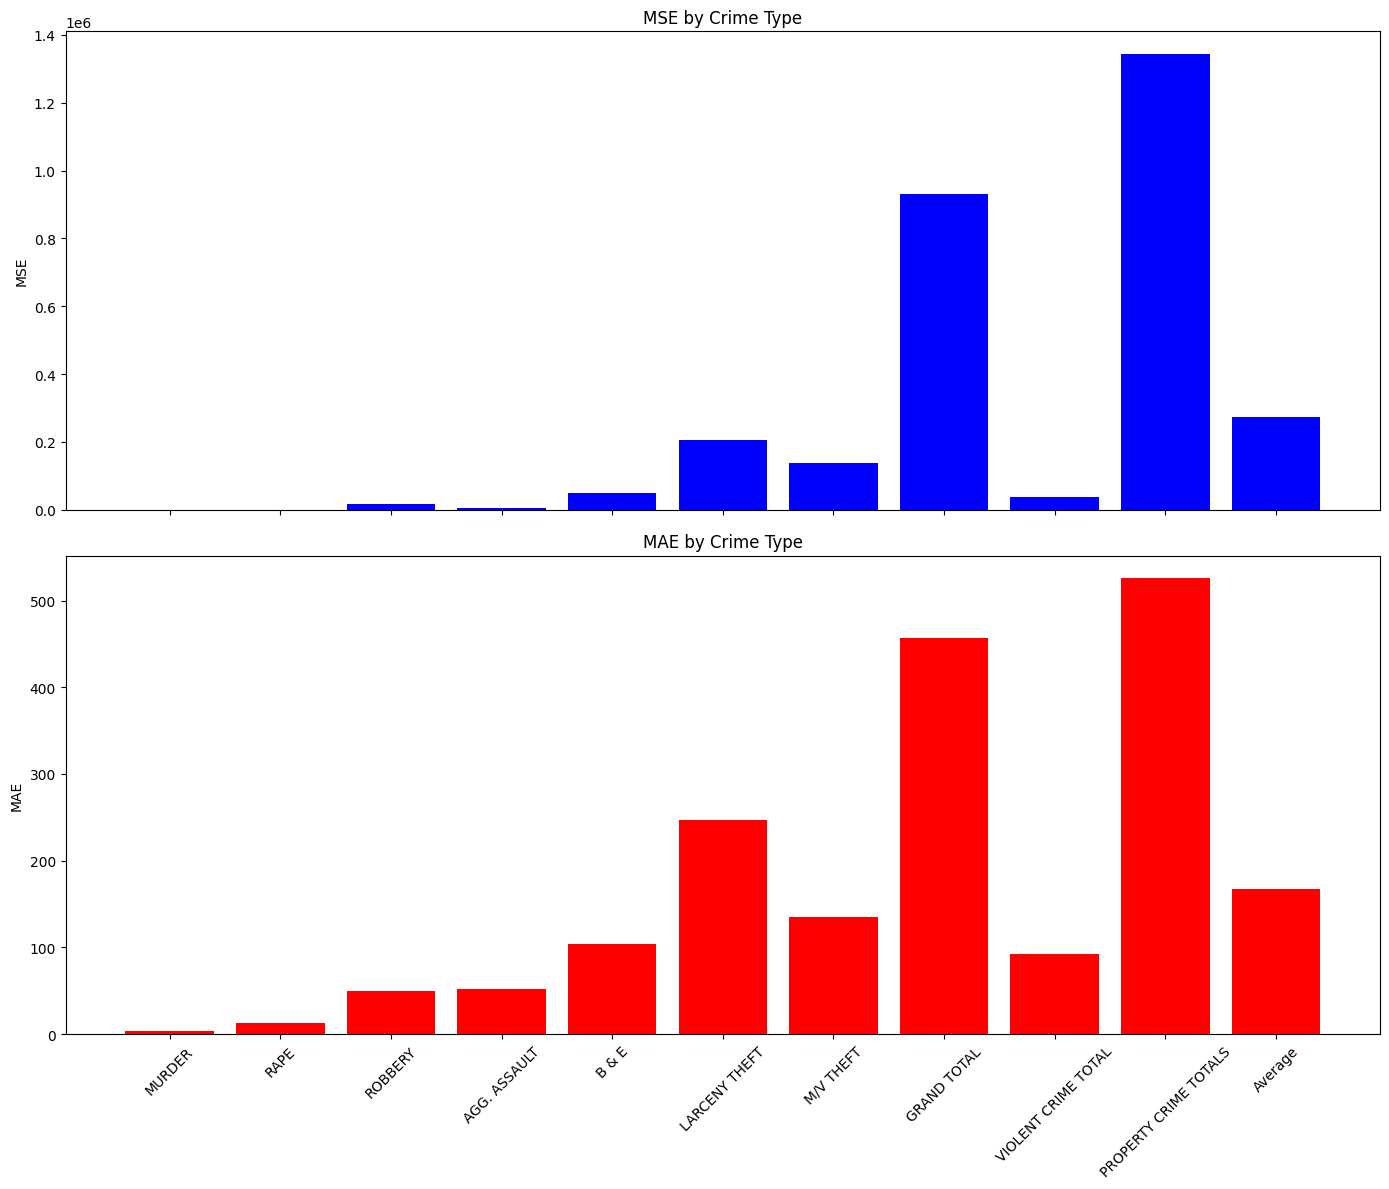

In [31]:

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# MSE Bar Graph
ax[0].bar(results_df['Crime Type'], results_df['MSE'], color='blue')
ax[0].set_title('MSE by Crime Type')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)

# MAE Bar Graph
ax[1].bar(results_df['Crime Type'], results_df['MAE'], color='red')
ax[1].set_title('MAE by Crime Type')
ax[1].set_ylabel('MAE')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()